In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [82]:
questions = {
    'course': map(lambda x: 'Q'+str(x), [1, 2, 3, 4, 5, 6, 7, 8]),
    'instructor': map(lambda x: 'Q'+str(x), [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
    'personal': map(lambda x: 'Q'+str(x), [9, 10, 11, 12])
}
df = pd.read_csv('data.csv')
#df['difficulty'] = df['difficulty'].map(lambda x: x - 2)
print(df['nb.repeat'].unique())
print(df['attendance'].unique())

[1 3 2]
[0 1 2 3 4]


In [4]:
# which classes does each instructor teach
df.groupby('instr')['class'].unique()

instr
1                 [2, 7, 10]
2             [1, 6, 11, 13]
3    [3, 4, 5, 8, 9, 12, 13]
Name: class, dtype: object

In [5]:
# for each teacher find how many rows that have nb.repeat > 1
df[df['nb.repeat'] > 1].groupby('instr')['nb.repeat'].count()

instr
1     70
2    153
3    688
Name: nb.repeat, dtype: int64

In [6]:
# for each teacher find how many rows that have nb.repeat == 1
df[df['nb.repeat'] == 1].groupby('instr')['nb.repeat'].count()

instr
1     705
2    1291
3    2913
Name: nb.repeat, dtype: int64

In [7]:
df.groupby('instr')['nb.repeat'].count()

instr
1     775
2    1444
3    3601
Name: nb.repeat, dtype: int64

In [8]:
df.groupby('attendance')['attendance'].count()

attendance
0    1902
1    1028
2     792
3    1252
4     846
Name: attendance, dtype: int64

In [9]:
df.groupby(['attendance', 'difficulty']).size().reset_index().rename(columns={0: 'count'}).sort_values('count', ascending=[False])

,attendance,difficulty,count
0,0,1,1317
17,3,3,500
18,3,4,395
7,1,3,380
12,2,3,344
22,4,3,329
8,1,4,251
13,2,4,229
2,0,3,221
23,4,4,205


In [10]:
# instr - nominal
# class - nominal
# nb.repeat - ratio
# attendance - ratio
# difficulty - 

#### Let's analyze the 'attendance' column

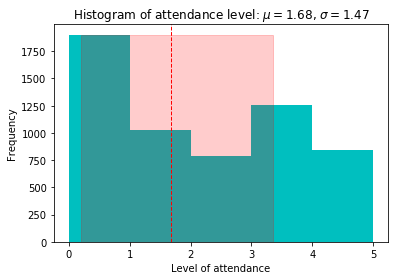

In [11]:
# Create figure and axes
fig, ax = plt.subplots(1)

bins = [i for i in range(0, 6)]
attendance = np.array(df['attendance'])
# n - the count of each attendance value
# bins - the columns
# patches - the refference to the rectangles
n, bins, patches = plt.hist(attendance, bins=bins, histtype='bar', facecolor='c')

plt.xticks(bins)

plt.xlabel('Level of attendance')
plt.ylabel('Frequency')
#plt.title('Level of attendance distribution')

mean = df['attendance'].describe()['mean'] # mean of distribution
std = df['attendance'].describe()['std'] # standard deviation of distribution

rect = Rectangle((mean - std, 0), mean + std, n[0], linewidth=1,edgecolor='r',facecolor='r', alpha=0.2)
ax.add_patch(rect)

line = plt.axvline(mean, color='r', linestyle='dashed', linewidth=1)
#plt.text(mean*1.1, max(n)*0.9, 'Mean: {:.2f}'.format(mean))
#plt.text(mean*1.1, max(n)*0.8, 'STD: {:.2f}'.format(std))

_ = plt.title(r'Histogram of attendance level: $\mu={:.2f}$, $\sigma={:.2f}$'.format(mean, std))

In [12]:
df.groupby('attendance')['difficulty'].describe()['mean']

attendance
0    1.765510
1    3.177043
2    3.281566
3    3.330671
4    3.317967
Name: mean, dtype: float64

In [68]:
#df.groupby(['nb.repeat', 'attendance', 'difficulty']).count()[['nb.repeat', 'attendance']]
df.groupby('class')['nb.repeat'].describe()

total_per_class = df.groupby('class').agg({'class': 'count'}).rename(columns={'class': 'class_count'})  # class_nr, total
total_per_class = total_per_class[total_per_class['class_count'] >= 200] # so that one person represents at most .5%
temp = df[df['nb.repeat'] > 1].groupby(['class'])[['class']].count().rename(columns={'class': 'repeat_count'})
df.groupby(['class', 'instr']).count()['nb.repeat']
total_per_instr = df[df['nb.repeat'] > 1].groupby(['class', 'nb.repeat', 'instr']).count()
total_per_instr.head()
for index in total_per_class.index:
    count = temp.loc[index]['repeat_count']
    class_ = index
    total = total_per_class.loc[index]['class_count']
    print(index, total, count / total * 100)

1 303 10.231023102310232
3 904 13.938053097345133
5 656 6.859756097560976
6 558 11.469534050179211
8 500 24.2
9 571 29.947460595446586
10 448 5.133928571428571
11 484 10.950413223140496
13 841 22.59215219976219


In [116]:
total_per_class_instr = df.groupby(['class', 'instr']).agg({'class': 'count'}).rename(columns={'class': 'count'})
#total_per_class_instr = total_per_class_instr[total_per_class_instr['count'] >= 200]
total_repeat_per_instr = df[df['nb.repeat'] > 1].groupby(['class', 'instr']).agg({'class': 'count'}).rename(columns={'class': 'count'})
total_per_class_instr
#df[(df['class'] == total_per_class_instr['class']) & (df['instr'] == total_per_class_instr['instr'])]

,,count
class,instr,
1,2,303
2,1,140
3,3,904
4,3,187
5,3,656
6,2,558
7,1,187
8,3,500
9,3,571
